# Boston vs. Seattle Airbnb II 

**In this notebook(Part 2), I will be answering the question: What are the important amenities of these listings? Compare the two cities.**

In [1]:
import warnings
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None)

## Question 1: What are the important amenities of these listings? Compare the two cities.

**In Part I, we found out the names of each neighbourhood that are in each cities along with the prices. Please refer back to that to study the distributions of the listings. For this part, we will mainly be working on finding out the amenities and using the results to compare the 2 cities side by side with the help of a bar plot..**

**In order to find out the importance, we will be using the ratings column.**

In [2]:
#import necessary datasets
seattle_listings = pd.read_csv('seattle_airbnb/listings.csv')
boston_listings = pd.read_csv('boston_airbnb/listings.csv')

### **Seattle Dataset Examination**

In [3]:
seattle_listings.head(2)

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,NaN,NaN,NaN,NaN,https://a1.muscache.com/ac/pictures/67560560/c...,NaN,956883,https://www.airbnb.com/users/show/956883,Maija,2011-08-11,"Seattle, Washington, United States","I am an artist, interior designer, and run a s...",within a few hours,96%,100%,f,https://a0.muscache.com/ac/users/956883/profil...,https://a0.muscache.com/ac/users/956883/profil...,Queen Anne,3.0,3.0,"['email', 'phone', 'reviews', 'kba']",t,t,"Gilman Dr W, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,Queen Anne,Seattle,WA,98119,Seattle,"Seattle, WA",US,United States,47.636289,-122.371025,t,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",NaN,$85.00,NaN,NaN,NaN,NaN,2,$5.00,1,365,4 weeks ago,t,14,41,71,346,2016-01-04,207,2011-11-01,2016-01-02,95.0,10.0,10.0,10.0,10.0,9.0,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",What's up with the free pillows? Our home was...,"Convenient bus stops are just down the block, ...",https://a0.muscache.com/ac/pictures/14409893/f...,https://a0.muscache.com/im/pictures/14409893/f...,https://a0.muscache.com/ac/pictures/14409893/f...,https://a0.muscache.com/ac/pictures/14409893/f...,5177328,https://www.airbnb.com/users/show/5177328,Andrea,2013-02-21,"Seattle, Washington, United States",Living east coast/left coast/overseas. Time i...,within an hour,98%,100%,t,https://a0.muscache.com/ac/users/5177328/profi...,https://a0.muscache.com/ac/users/5177328/profi...,Queen Anne,6.0,6.0,"['email', 'phone', 'facebook', 'linkedin', 're...",t,t,"7th Avenue West, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,Queen Anne,Seattle,WA,98119,Seattle,"Seattle, WA",US,United States,47.639123,-122.365666,t,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,"{TV,Internet,""Wireless Internet"",Kitchen,""Free...",NaN,$150.00,"$1,000.00","$3,000.00",$100.00,$40.00,1,$0.00,2,90,today,t,13,13,16,291,2016-01-04,43,2013-08-19,2015-12-29,96.0,10.0,10.0,10.0,10.0,10.0,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48


In [4]:
#make a copy with the interested columns
seattle_amenities = seattle_listings[['id','price','neighbourhood_group_cleansed', 'amenities', 'review_scores_rating', 
                                      'number_of_reviews']] # I included the price and reviews as well
seattle_amenities.head(3)

,id,price,neighbourhood_group_cleansed,amenities,review_scores_rating,number_of_reviews
0,241032,$85.00,Queen Anne,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",95.0,207
1,953595,$150.00,Queen Anne,"{TV,Internet,""Wireless Internet"",Kitchen,""Free...",96.0,43
2,3308979,$975.00,Queen Anne,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",97.0,20


In [5]:
seattle_amenities.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 6 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   id                            3818 non-null   int64  
 1   price                         3818 non-null   object 
 2   neighbourhood_group_cleansed  3818 non-null   object 
 3   amenities                     3818 non-null   object 
 4   review_scores_rating          3171 non-null   float64
 5   number_of_reviews             3818 non-null   int64  
dtypes: float64(1), int64(2), object(3)
memory usage: 179.1+ KB


**Here we can see that the `review_scores_rating` column has null values.**

### **Boston Dataset Examination**

In [6]:
#make a copy with the interested columns
boston_amenities = boston_listings[['id','price', 'neighbourhood_cleansed','amenities', 'review_scores_rating', 
                                      'number_of_reviews']] # I included the price as well
boston_amenities.head(3)

,id,price,neighbourhood_cleansed,amenities,review_scores_rating,number_of_reviews
0,12147973,$250.00,Roslindale,"{TV,""Wireless Internet"",Kitchen,""Free Parking ...",NaN,0
1,3075044,$65.00,Roslindale,"{TV,Internet,""Wireless Internet"",""Air Conditio...",94.0,36
2,6976,$65.00,Roslindale,"{TV,""Cable TV"",""Wireless Internet"",""Air Condit...",98.0,41


In [7]:
boston_amenities.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3585 entries, 0 to 3584
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      3585 non-null   int64  
 1   price                   3585 non-null   object 
 2   neighbourhood_cleansed  3585 non-null   object 
 3   amenities               3585 non-null   object 
 4   review_scores_rating    2772 non-null   float64
 5   number_of_reviews       3585 non-null   int64  
dtypes: float64(1), int64(2), object(3)
memory usage: 168.2+ KB


### Step 1: Addressing And Handling Missing Data 

**We will first view a dataframe where the `review_scores_rating` has null values then decide what to do from there.**

In [8]:
seattle_amenities[(seattle_amenities.review_scores_rating.isnull())]

,id,price,neighbourhood_group_cleansed,amenities,review_scores_rating,number_of_reviews
3,7421966,$100.00,Queen Anne,"{Internet,""Wireless Internet"",Kitchen,""Indoor ...",NaN,0
18,7735464,$200.00,Queen Anne,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",NaN,0
23,10106055,$75.00,Queen Anne,"{Internet,""Wireless Internet"",""Air Conditionin...",NaN,0
26,9025039,$150.00,Queen Anne,"{""Cable TV"",""Wireless Internet"",Kitchen,""Free ...",NaN,0
46,9550869,$349.00,Queen Anne,"{Internet,""Wireless Internet"",Kitchen,""Free Pa...",NaN,0
...,...,...,...,...,...,...
3800,5482204,$185.00,Other neighborhoods,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",NaN,0
3802,8562314,$200.00,Other neighborhoods,"{TV,""Wireless Internet"",Kitchen,""Pets Allowed""...",NaN,0
3815,10267360,$93.00,Rainier Valley,"{""Cable TV"",""Wireless Internet"",Kitchen,""Free ...",NaN,0
3816,9604740,$99.00,Capitol Hill,"{TV,""Wireless Internet"",Kitchen,""Free Parking ...",NaN,0


**This is interesting. There are quite a number of rows with 0 reviews. Let's see if there are any with at least 1 review.**

In [9]:
seattle_amenities[(seattle_amenities.review_scores_rating.isnull()) & 
                  (seattle_amenities.number_of_reviews) > 0]

,id,price,neighbourhood_group_cleansed,amenities,review_scores_rating,number_of_reviews
204,9028447,$100.00,Queen Anne,"{TV,Internet,""Wireless Internet"",Kitchen,Heati...",NaN,1
283,5336585,$75.00,Other neighborhoods,"{Internet,Kitchen,""Smoking Allowed"",""Pets Allo...",NaN,1
361,8207848,$259.00,Other neighborhoods,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",NaN,1
482,186328,$250.00,Queen Anne,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",NaN,1
527,790860,$450.00,Other neighborhoods,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",NaN,1
774,7536074,$185.00,University District,"{""Elevator in Building"",Washer,""Smoke Detector""}",NaN,1
804,7807658,$118.00,University District,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",NaN,1
1024,8103432,$140.00,Central Area,"{Internet,""Wireless Internet"",Kitchen,""Free Pa...",NaN,1
1457,9012948,$130.00,Downtown,"{TV,Internet,""Wireless Internet"",Kitchen,""Pets...",NaN,1
1702,8338155,$65.00,Downtown,"{""Wireless Internet"",Kitchen,Heating,Washer,Dr...",NaN,1


**Solutions:**
> **`1.` For those where the number of reviews are greater than 0, it makes sense to drop these rows because we have no way of figuring out what the actual rating is.** <br>
**`2.` For those where the number of reviews is 0, we will keep and impute the null values with 0.** <br>
**`3.` We will apply this to both cities' datasets.**

In [10]:
# get inverted version
seattle_amenities = seattle_amenities.loc[~(((seattle_amenities.review_scores_rating.isnull()) & 
                  (seattle_amenities.number_of_reviews) > 0))]
# replace all remaining null value in review_scores_rating with 0
seattle_amenities.fillna(value = 0, inplace = True)

In [11]:
# Check by using info()
seattle_amenities.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3798 entries, 0 to 3817
Data columns (total 6 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   id                            3798 non-null   int64  
 1   price                         3798 non-null   object 
 2   neighbourhood_group_cleansed  3798 non-null   object 
 3   amenities                     3798 non-null   object 
 4   review_scores_rating          3798 non-null   float64
 5   number_of_reviews             3798 non-null   int64  
dtypes: float64(1), int64(2), object(3)
memory usage: 207.7+ KB


In [12]:
boston_amenities = boston_amenities.loc[~(((boston_amenities.review_scores_rating.isnull()) & 
                  (boston_amenities.number_of_reviews) > 0))]
# replace all remaining null value in review_scores_rating with 0
boston_amenities.fillna(value = 0, inplace = True)

In [13]:
# Check by using info()
boston_amenities.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3534 entries, 0 to 3584
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      3534 non-null   int64  
 1   price                   3534 non-null   object 
 2   neighbourhood_cleansed  3534 non-null   object 
 3   amenities               3534 non-null   object 
 4   review_scores_rating    3534 non-null   float64
 5   number_of_reviews       3534 non-null   int64  
dtypes: float64(1), int64(2), object(3)
memory usage: 193.3+ KB


### Step 2: Cleaning Data 

In [14]:
# view the 1st value of the amenities column
seattle_amenities.amenities[0]

'{TV,"Cable TV",Internet,"Wireless Internet","Air Conditioning",Kitchen,Heating,"Family/Kid Friendly",Washer,Dryer}'

In [15]:
# split() help: https://www.w3schools.com/python/ref_string_split.asp
clean_seattle_amenities = (seattle_amenities.amenities.str.replace('{','').str.replace('}','')
                           .str.replace('"','').str.get_dummies(sep=','))

In [16]:
seattle_amenities = pd.concat([seattle_amenities, clean_seattle_amenities], axis=1) #combine the datasets into one
seattle_amenities.drop(columns = ['amenities'], inplace = True)
seattle_amenities.head(2)

,id,price,neighbourhood_group_cleansed,review_scores_rating,number_of_reviews,24-Hour Check-in,Air Conditioning,Breakfast,Buzzer/Wireless Intercom,Cable TV,Carbon Monoxide Detector,Cat(s),Dog(s),Doorman,Dryer,Elevator in Building,Essentials,Family/Kid Friendly,Fire Extinguisher,First Aid Kit,Free Parking on Premises,Gym,Hair Dryer,Hangers,Heating,Hot Tub,Indoor Fireplace,Internet,Iron,Kitchen,Laptop Friendly Workspace,Lock on Bedroom Door,Other pet(s),Pets Allowed,Pets live on this property,Pool,Safety Card,Shampoo,Smoke Detector,Smoking Allowed,Suitable for Events,TV,Washer,Washer / Dryer,Wheelchair Accessible,Wireless Internet
0,241032,$85.00,Queen Anne,95.0,207,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1
1,953595,$150.00,Queen Anne,96.0,43,0,0,0,1,0,1,0,0,0,1,0,1,1,1,1,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,1,0,0,1,1,0,0,1


In [17]:
# this time we will do the same to the Boston dataset
clean_boston_amenities = (boston_amenities.amenities.str.replace('{','').str.replace('}','')
                           .str.replace('"','').str.get_dummies(sep=','))
boston_amenities = pd.concat([boston_amenities, clean_boston_amenities], axis=1)
boston_amenities.drop(columns = ['amenities'], inplace = True)
boston_amenities.head(2)

,id,price,neighbourhood_cleansed,review_scores_rating,number_of_reviews,24-Hour Check-in,Air Conditioning,Breakfast,Buzzer/Wireless Intercom,Cable TV,Carbon Monoxide Detector,Cat(s),Dog(s),Doorman,Dryer,Elevator in Building,Essentials,Family/Kid Friendly,Fire Extinguisher,First Aid Kit,Free Parking on Premises,Free Parking on Street,Gym,Hair Dryer,Hangers,Heating,Hot Tub,Indoor Fireplace,Internet,Iron,Kitchen,Laptop Friendly Workspace,Lock on Bedroom Door,Other pet(s),Paid Parking Off Premises,Pets Allowed,Pets live on this property,Pool,Safety Card,Shampoo,Smoke Detector,Smoking Allowed,Suitable for Events,TV,Washer,Washer / Dryer,Wheelchair Accessible,Wireless Internet,translation missing: en.hosting_amenity_49,translation missing: en.hosting_amenity_50
0,12147973,$250.00,Roslindale,0.0,0,0,0,0,0,0,0,0,1,0,1,0,1,1,1,0,1,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,1,1,0,0,1,0,0
1,3075044,$65.00,Roslindale,94.0,36,0,1,0,0,0,1,0,1,0,1,0,1,1,1,0,0,0,0,1,1,1,0,0,1,1,1,0,1,0,0,1,1,0,0,1,1,0,0,1,1,0,0,1,0,0


In [18]:
# personal reminder - iloc = [m,n]
seattle_offerings = seattle_amenities.iloc[:,5:].sum().sort_values(ascending = False).reset_index() # get sum of each amenity and sort them
seattle_offerings.columns = ['Amenity','Total # Of Listings']
# find out the % of offerings in each city that offers said amenity
seattle_offerings['% Of Houses'] = (seattle_offerings['Total # Of Listings']/seattle_amenities.shape[0])*100

seattle_offerings.head()

,Amenity,Total # Of Listings,% Of Houses
0,Wireless Internet,3650,96.103212
1,Heating,3612,95.102686
2,Kitchen,3405,89.652449
3,Smoke Detector,3267,86.018957
4,Essentials,3224,84.886783


In [19]:
# do it again with Boston dataset
boston_offerings = boston_amenities.iloc[:,5:].sum().sort_values(ascending = False).reset_index() # get sum of each amenity and sort them
boston_offerings.columns = ['Amenity','Total # Of Listings']
boston_offerings['% Of Houses'] = (boston_offerings['Total # Of Listings']/boston_amenities.shape[0])*100

boston_offerings.head()

,Amenity,Total # Of Listings,% Of Houses
0,Wireless Internet,3376,95.529145
1,Heating,3335,94.368987
2,Kitchen,3236,91.567629
3,Essentials,2952,83.531409
4,Smoke Detector,2876,81.380872


### Step 3: Visualizing Data 
> **Note: <br> When I plotted all of the amenities, the resulting bar chart looked very cluttered and noisy. Therefore, I will only be focusing on the top 20 amenities. Furthermore, if I include all of them, I will be answering the question. The list most be narrowed down.**

#### Bar Chart Visuals: Boston Top 20 Amenities

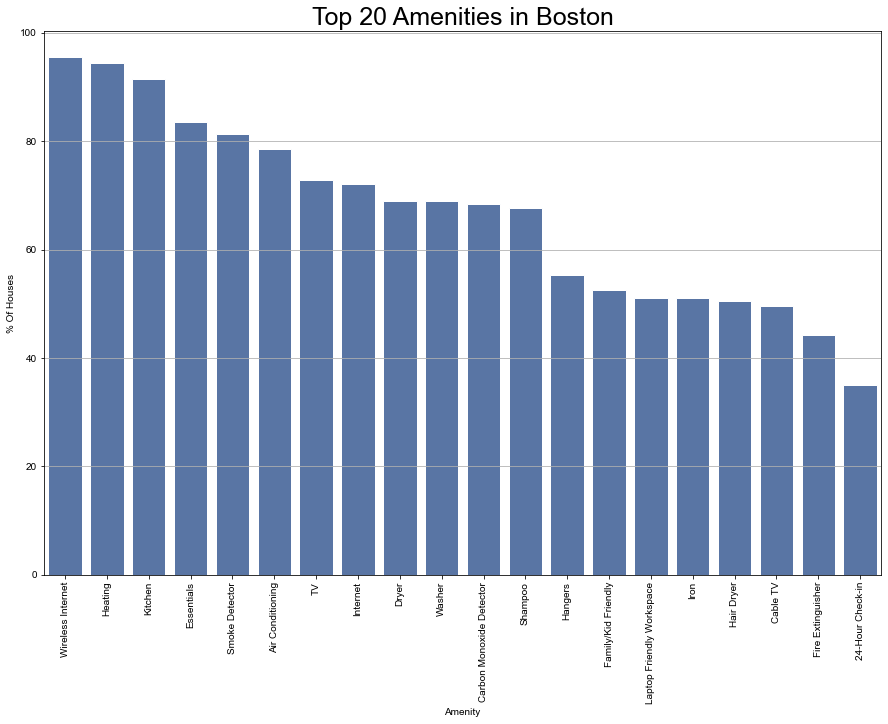

In [20]:
plt.rcParams['figure.figsize'] = [15, 10]
plt.grid(b=None)

sb.set_theme(style="whitegrid")
base_color = sb.color_palette()[0]
sb.barplot(x="Amenity", y="% Of Houses", data=boston_offerings[:20], color = base_color)
plt.xticks(rotation = 90)
plt.title("Top 20 Amenities in Boston", fontsize=25)
plt.savefig('Barplot:Top 20 Amenities in Boston.png');

#### Bar Chart Visuals: Seattle Top 20 Amenities

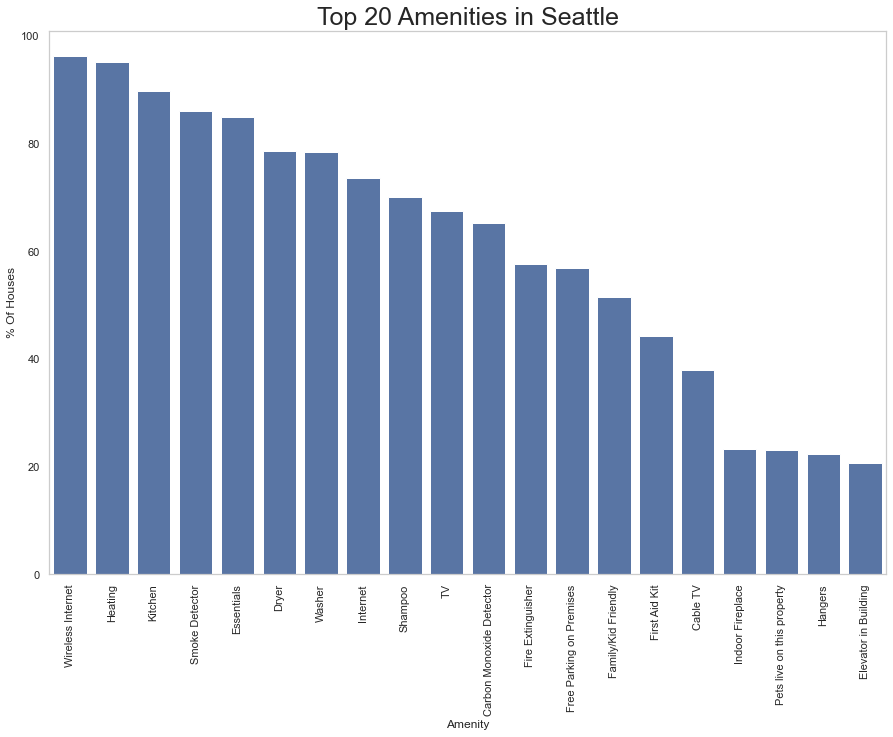

In [21]:
plt.rcParams['figure.figsize'] = [15, 10]
base_color = sb.color_palette()[0]
plt.grid(b=None)

sb.set_theme(style="whitegrid")
sb.barplot(x="Amenity", y="% Of Houses", data=seattle_offerings[:20], color = base_color)
plt.xticks(rotation = 90)
plt.title("Top 20 Amenities in Seattle", fontsize=25)
plt.savefig('Barplot:Top 20 Amenities in Seattle.png');

**Here we can see that the 2 cities share many of the same amenities.<br> 
`1.`One of the only difference I can find is that Boston has more properties with elevators. However, it since the top 20 are a little different I will need to create 2 bar charts to fully compare the top amenities in each cities. So, I will start off with Boston first.**

#### Bar Plot Visualization #1 (ORDERED BY % Of Houses_Boston )

In [22]:
# merging help : https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.merge.html
all_amenities = boston_offerings.merge(seattle_offerings, on = 'Amenity', suffixes = ('_Boston', '_Seattle'))
all_amenities = all_amenities.sort_values(by = '% Of Houses_Boston', ascending = False)
all_amenities.head()

,Amenity,Total # Of Listings_Boston,% Of Houses_Boston,Total # Of Listings_Seattle,% Of Houses_Seattle
0,Wireless Internet,3376,95.529145,3650,96.103212
1,Heating,3335,94.368987,3612,95.102686
2,Kitchen,3236,91.567629,3405,89.652449
3,Essentials,2952,83.531409,3224,84.886783
4,Smoke Detector,2876,81.380872,3267,86.018957


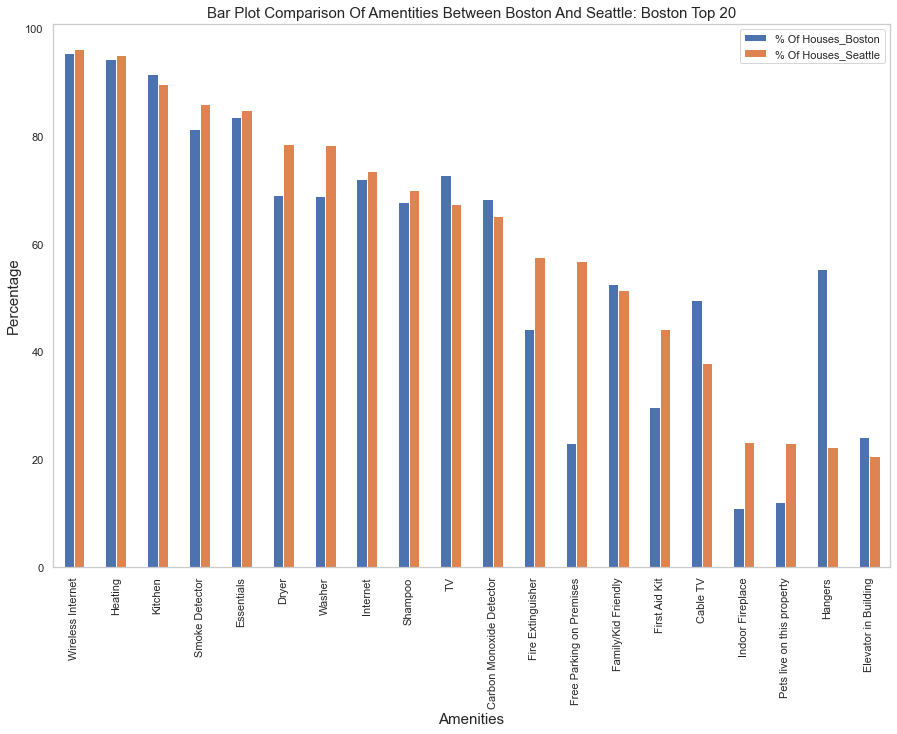

In [27]:
plt.rcParams['figure.figsize'] = [15, 10]

# plot top 20 only: first we will compare the list with Seattle's top 20  
all_amenities.head(20).plot(x = 'Amenity', y = ['% Of Houses_Boston', '% Of Houses_Seattle'],
                           kind = 'bar', grid = False)
plt.title('Bar Plot Comparison Of Amentities Between Boston And Seattle: Boston Top 20', fontsize=15)
plt.ylabel('Percentage', fontsize=15)
plt.xlabel('Amenities', fontsize=15)
plt.savefig('Barplot:Comparison Of Amentities Between Boston And Seattle: Boston Top 20.png',
           bbox_inches='tight');

#### Bar Plot Visualization #2 (ORDERED BY % Of Houses_Seattle )

In [24]:
# we must repeat the abovce step because the first comparison was ordered by Boston
all_amenities = seattle_offerings.merge(boston_offerings, on = 'Amenity', suffixes = ('_Seattle', '_Boston'))
all_amenities = all_amenities.sort_values(by = '% Of Houses_Seattle', ascending = False)
all_amenities.head()

,Amenity,Total # Of Listings_Seattle,% Of Houses_Seattle,Total # Of Listings_Boston,% Of Houses_Boston
0,Wireless Internet,3650,96.103212,3376,95.529145
1,Heating,3612,95.102686,3335,94.368987
2,Kitchen,3405,89.652449,3236,91.567629
3,Smoke Detector,3267,86.018957,2876,81.380872
4,Essentials,3224,84.886783,2952,83.531409


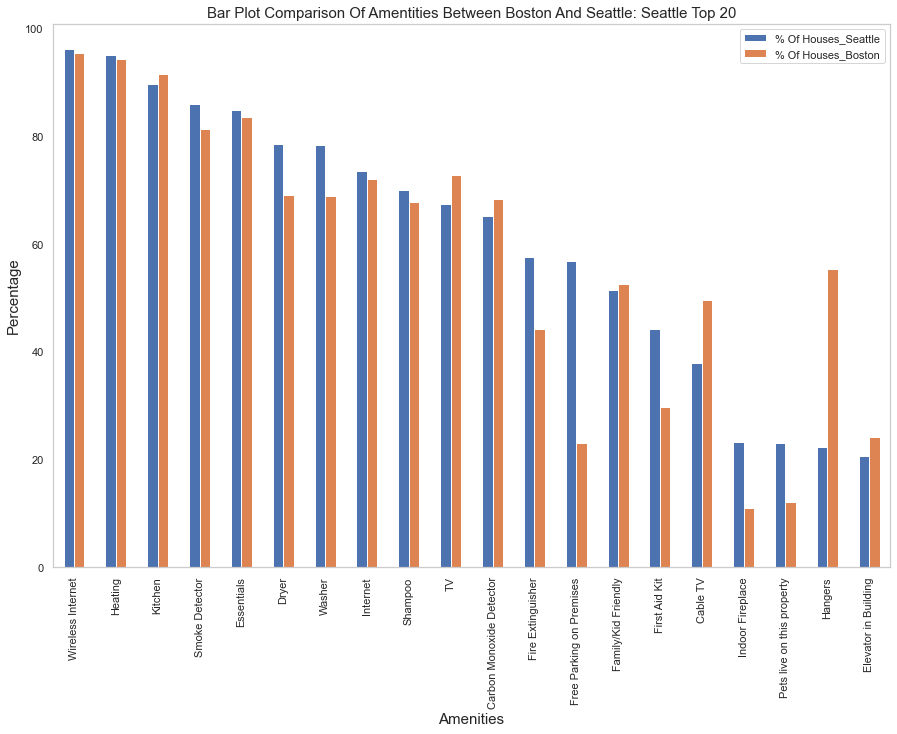

In [28]:
plt.rcParams['figure.figsize'] = [15, 10]

# plot top 20 only: first we will compare the list with Seattle's top 20  
all_amenities.head(20).plot(x = 'Amenity', y = ['% Of Houses_Seattle', '% Of Houses_Boston'],
                           kind = 'bar', grid = False)
plt.title('Bar Plot Comparison Of Amentities Between Boston And Seattle: Seattle Top 20', fontsize=15)
plt.ylabel('Percentage', fontsize=15)
plt.xlabel('Amenities', fontsize=15)
plt.savefig('Barplot:Comparison Of Amentities Between Boston And Seattle: Seattle Top 20.png',
           bbox_inches='tight');

**Takeaways:**
> **`1.` As started earlier, it seems that the majority of the top 20 amenities in both cities are very similar. In Boston, we can see that 'elevator in building' cracks the top 20 while in Seattle it doesn't.<br>`2.` One interesting thing that I see is that Boston's properties have quite alot of 'Laptop friendly Workplace'.<br> `3.` It seems like the top 3 amenities in both cities are the same: Wireless Internet, Heating and Kitchen. <br> `4.` Seattle has almost a 1/3 of Boston's total for the 'air conditioning column'(Living in California, I can understand why). The city also has far more properties with first-aid kits & free parking on premise.**